In [1]:
from importlib import import_module
import torch
from torchviz import make_dot
x = import_module('models.TextCNN')  # 动态导入对应训练类
config = x.Config('ship_data', 'embedding.npz')  # 创建对应类的配置文件

In [2]:
model = x.Model(config)
#试算一下
vis=model(torch.randint(10,[1,30]))

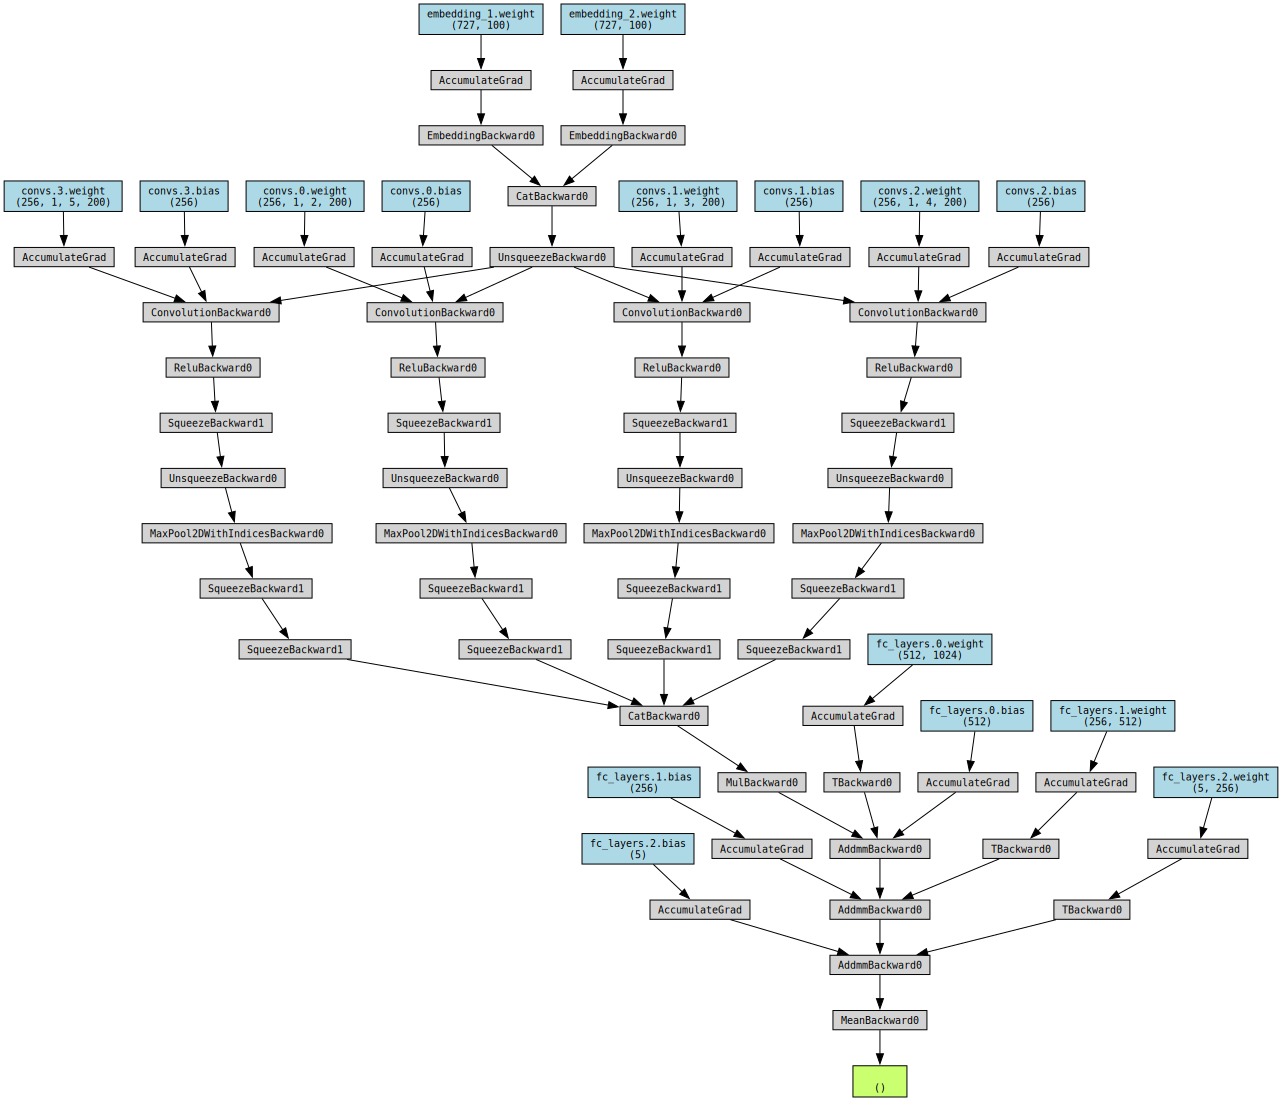

In [3]:
make_dot(vis.mean(), params=dict(model.named_parameters()),show_saved=False,show_attrs=False)

In [4]:
from torchinfo import summary

batch_size=1
summary(model, input_size=(batch_size, 30),dtypes=[torch.long])

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [1, 5]                    --
├─Embedding: 1-1                         [1, 30, 100]              72,700
├─Embedding: 1-2                         [1, 30, 100]              72,700
├─ModuleList: 1-3                        --                        --
│    └─Conv2d: 2-1                       [1, 256, 29, 1]           102,656
│    └─Conv2d: 2-2                       [1, 256, 28, 1]           153,856
│    └─Conv2d: 2-3                       [1, 256, 27, 1]           205,056
│    └─Conv2d: 2-4                       [1, 256, 26, 1]           256,256
├─Dropout: 1-4                           [1, 1024]                 --
├─Sequential: 1-5                        [1, 5]                    --
│    └─Linear: 2-5                       [1, 512]                  524,800
│    └─Linear: 2-6                       [1, 256]                  131,328
│    └─Linear: 2-7                       [1, 5]